<a href="https://colab.research.google.com/github/Alex777Gold/bachelor-s_degree_project/blob/main/bachelor_s_degree_project_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using code from the source: https://youtu.be/QIUxPv5PJOY

In [28]:
import yfinance as yf

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#Visulization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
df = yf.download('INTC', start='2010-01-01', end='2011-01-01')

print(df)

rows = df.shape
print(rows)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  20.790001  21.030001  20.730000  20.879999  13.605188  47800900
2010-01-05  20.940001  20.990000  20.600000  20.870001  13.598672  52357700
2010-01-06  20.809999  20.930000  20.670000  20.799999  13.553061  40037400
2010-01-07  20.730000  20.760000  20.340000  20.600000  13.422740  54041500
2010-01-08  20.540001  20.889999  20.400000  20.830000  13.572612  48234700
...               ...        ...        ...        ...        ...       ...
2010-12-27  20.750000  20.860001  20.650000  20.840000  13.998181  18604300
2010-12-28  20.809999  20.930000  20.760000  20.879999  14.025044  21169600
2010-12-29  20.940001  21.059999  20.879999  20.940001  14.065340  20848400
2010-12-30  20.950001  21.080000  20.930000  21.020000  14.119081  18876000
2010-12-31  21.030001  21.059999  20.940001  21.030001  14.125800  15743700

[252 rows x

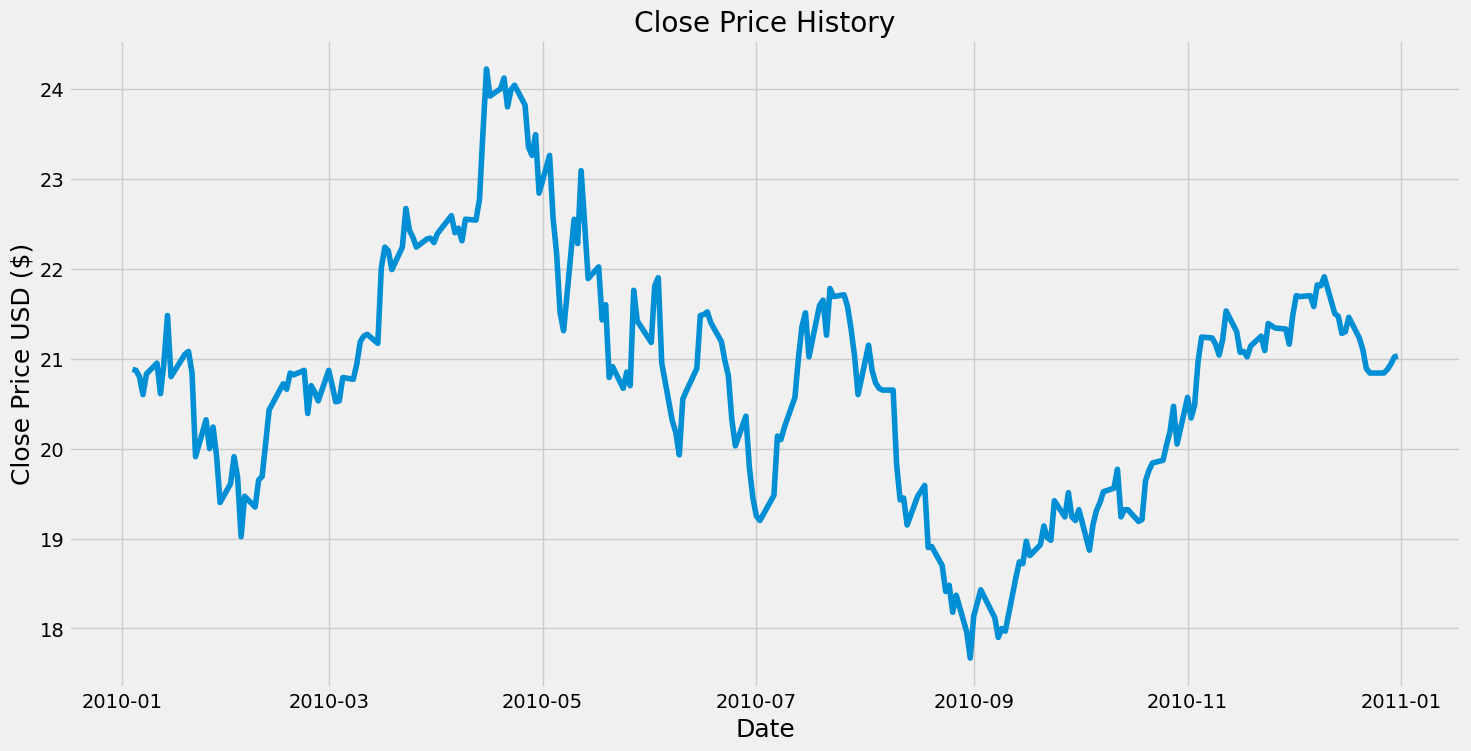

In [30]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [31]:
#Create dataframe
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )
print(training_data_len)

202


In [32]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.49007625]
 [0.48854979]
 [0.47786252]
 [0.44732834]
 [0.48244278]
 [0.50076352]
 [0.4488551 ]
 [0.50228998]
 [0.58167938]
 [0.47786252]
 [0.51603047]
 [0.52061072]
 [0.48396953]
 [0.34198474]
 [0.40458014]
 [0.35572522]
 [0.39236641]
 [0.34351149]
 [0.2641221 ]
 [0.29618332]
 [0.34198474]
 [0.3068703 ]
 [0.20610695]
 [0.27480908]
 [0.25648863]
 [0.30229004]
 [0.30839705]
 [0.36488545]
 [0.42137413]
 [0.46564879]
 [0.45648857]
 [0.48396953]
 [0.48091603]
 [0.48854979]
 [0.41526712]
 [0.46259558]
 [0.45190831]
 [0.43664137]
 [0.48854979]
 [0.46259558]
 [0.43511461]
 [0.43664137]
 [0.47633606]
 [0.47328256]
 [0.49923677]
 [0.53740471]
 [0.54656494]
 [0.54961844]
 [0.53435121]
 [0.66259552]
 [0.69770996]
 [0.69160324]
 [0.65954201]
 [0.69770996]
 [0.76335887]
 [0.72671768]
 [0.71450395]
 [0.69770996]
 [0.71145044]
 [0.71297719]
 [0.70534372]
 [0.72061067]
 [0.75114514]
 [0.72213742]
 [0.72977118]
 [0.70839694]
 [0.74503813]
 [0.74351167]
 [0.7786261 ]
 [0.89312993]
 [1.        ]
 [0.95

In [33]:
#Create data set
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)

[array([0.49007625, 0.48854979, 0.47786252, 0.44732834, 0.48244278,
       0.50076352, 0.4488551 , 0.50228998, 0.58167938, 0.47786252])]
[0.5160304663307791]


In [34]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(192, 10, 1)


In [35]:
#Build model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


192/192 [==============================] - 6s 7ms/step - loss: 0.0211


In [37]:
 #Create the testing data set
test_data = scaled_data[training_data_len - 10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
   x_test.append(test_data[i-10:i, 0])

In [38]:
#Conver data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)

2/2 [==============================] - 1s 10ms/step
[[18.994898]
 [19.01946 ]
 [19.056194]
 [19.100935]
 [19.152033]
 [19.237062]
 [19.33836 ]
 [19.415936]
 [19.51533 ]
 [19.600204]
 [19.666166]
 [19.756844]
 [19.87361 ]
 [19.997631]
 [20.107494]
 [20.192776]
 [20.264318]
 [20.368887]
 [20.437143]
 [20.487343]
 [20.51388 ]
 [20.505644]
 [20.489782]
 [20.48574 ]
 [20.479303]
 [20.496674]
 [20.51193 ]
 [20.516895]
 [20.521261]
 [20.551172]
 [20.601665]
 [20.661781]
 [20.718084]
 [20.758865]
 [20.815382]
 [20.859379]
 [20.911064]
 [20.932297]
 [20.940775]
 [20.910254]
 [20.861975]
 [20.824635]
 [20.777845]
 [20.72531 ]
 [20.645613]
 [20.560041]
 [20.472782]
 [20.41173 ]
 [20.363556]
 [20.337805]]


In [39]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

0.7976850509643555


<ipython-input-40-aa91c73cd4c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


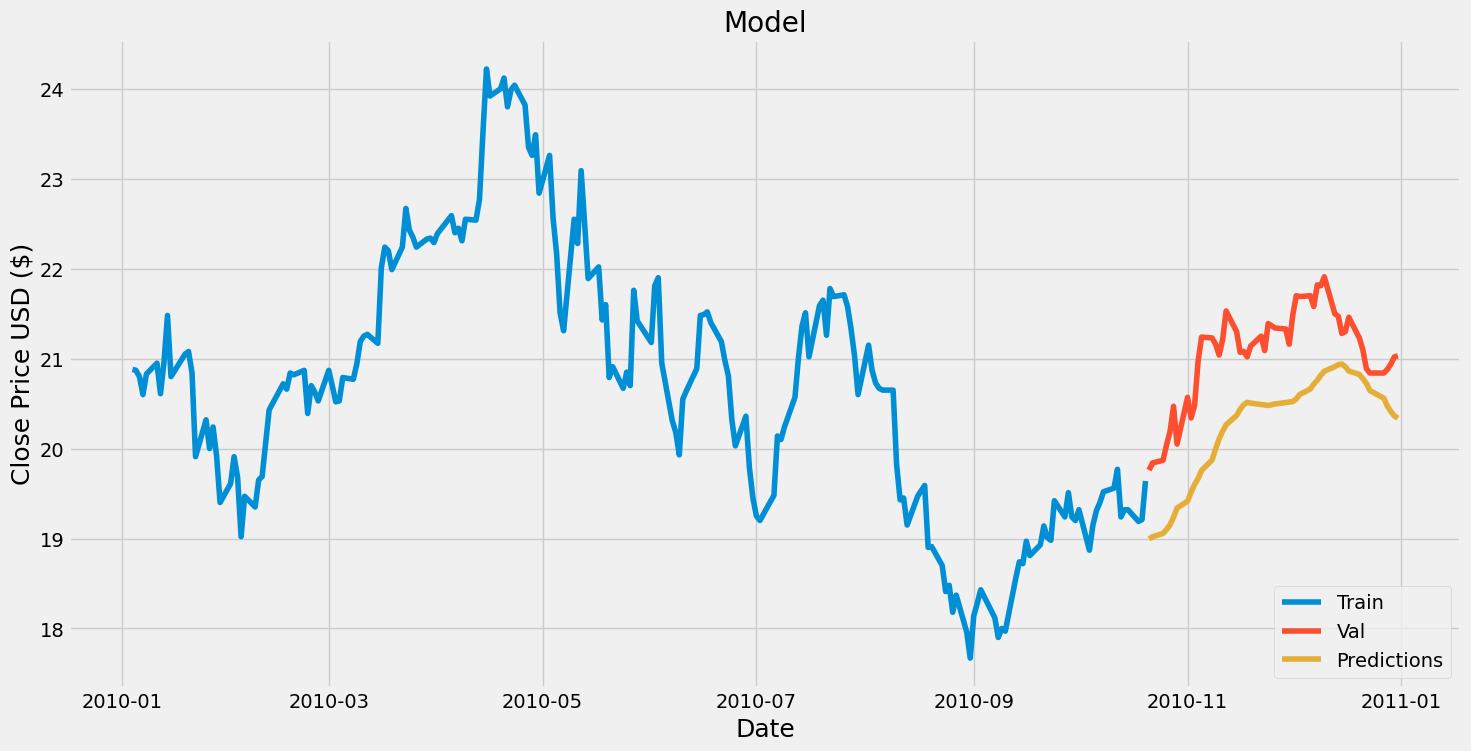

In [40]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid [['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()